In [19]:
import sys
sys.path.insert(0,'../sib/')
from matplotlib import cm

from time import time
import numpy as np
import pandas as pd
import os.path
from os import path
from scenario import Scenario
from sir_model import EpidemicModel, patient_zeros_states, symptomatic_individuals
# SIR parameters
location="networks"
N=500000
## new try with 100 spreaders
#N_patient_zero = 200;
N_patient_zero = 200;

lamb = 0.05;
mu = 0.02;

###
scale=1.0; # Easy Case
T=100;
t1 = 10;
# trac parameters
trac_tau = 5;
# MF parameters
MF_taus = [5];
MF_deltas = [15];
# observation parameters
n_rankings = [1500]#, 100, 150, 200]
#seeds=[2]
#n_rankings = [150]
seeds=[1,3,4,5]
#seed = int(sys.argv[2]);
#seeds for running [32,123,456]
#seed=int(sys.argv[1]);
################################################
n_ranking = n_rankings[0]
MF_tau = MF_taus[0];
MF_delta = MF_deltas[0];

scenario_rnds = {}
scenario_tracs = {}
scenario_tracs2nd = {}
scenario_MFs = {}
scenario_BPs = {}


for seed in seeds:
    #no_int = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed), sep="\t")
    scenario_rnds[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_rnd.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking), sep="\t")
    scenario_tracs[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_trac_t%d.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking,trac_tau), sep="\t")
    scenario_tracs2nd[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_trac2nd_t%d.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking,trac_tau), sep="\t")

    scenario_MFs[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_MF_t%d_d%d.csv"%(N/1000,T,t1,
                                                                                                                    N_patient_zero,mu,lamb,seed,n_ranking,MF_tau,MF_delta), sep="\t")
    scenario_BPs[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_bp_no_tau_win21.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking),sep="\t")
    #scenario_BPs[seed] = pd.read_csv("csv/Proximity_N%dK_T%d_s1_ti%d_pz%d_mu%.2f_l%.2f_seed%d_obs%d_bp%d.csv"%(N/1000,T,t1,N_patient_zero,mu,lamb,seed,n_ranking,trac_tau)
                      #, sep="\t")

scenario_rnd = scenario_rnds[seeds[0]].copy()
scenario_trac = scenario_tracs[seeds[0]].copy()
scenario_trac2nd = scenario_tracs2nd[seeds[0]].copy()
scenario_MF = scenario_MFs[seeds[0]].copy()
scenario_BP = scenario_BPs[seeds[0]].copy()
for seed in seeds[1:]:
    scenario_rnd += scenario_rnds[seed]
    scenario_trac += scenario_tracs[seed]
    scenario_trac2nd += scenario_tracs2nd[seed]
    scenario_MF += scenario_MFs[seed]
    scenario_BP += scenario_BPs[seed]
scenario_rnd/=len(seeds)
scenario_trac/=len(seeds)
scenario_trac2nd/=len(seeds)
scenario_MF/=len(seeds)
scenario_BP/=len(seeds)


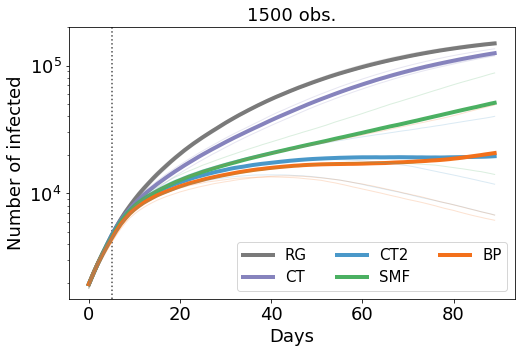

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
types = {'random':'Greys','tracing':'Purples', 'greedy2':'Blues', 'MF':'Greens', \
         'BP':'Oranges'}


alpha = 0.2
alpha1 = 1
alpham = 0.7
cmap = cm.get_cmap(types["random"])
ax = scenario_rnd[["I"]].sum(axis=1).plot(ax = axs, label="rnd", 
                                                      color=cmap(0.6), alpha = alpha1,
                                                     linewidth = 4.0)
cmap = cm.get_cmap(types["tracing"])
ax = scenario_trac[["I"]].sum(axis=1).plot(ax=ax, label="scenario_trac", 
                                                       color=cmap(0.6), alpha = alpha1,
                                                     linewidth = 4.0)
cmap = cm.get_cmap(types["greedy2"])
ax = scenario_trac2nd[["I"]].sum(axis=1).plot(ax=ax, label="scenario_trac2", 
                                                       color=cmap(0.6), alpha = alpha1,
                                                     linewidth = 4.0)
cmap = cm.get_cmap(types["MF"])
ax = scenario_MF[["I"]].sum(axis=1).plot(ax=ax, label="scenario_MF", 
                                                     color=cmap(0.6), alpha = alpha1,
                                                     linewidth = 4.0)
cmap = cm.get_cmap(types["BP"])
ax = scenario_BP[["I"]].sum(axis=1).plot(ax=ax, label="scenario_BP", 
                                                     color=cmap(0.6), alpha = alpha1,
                                                     linewidth = 4.0)

for seed in seeds:
    cmap = cm.get_cmap(types["random"])
    ax = scenario_rnds[seed][["I"]].sum(axis=1).plot(ax = axs, label="rnd", 
                                                          color=cmap(0.6), alpha = alpha,
                                                     linewidth = 1.0)
    cmap = cm.get_cmap(types["tracing"])
    ax = scenario_tracs[seed][["I"]].sum(axis=1).plot(ax=ax, label="scenario_trac", 
                                                           color=cmap(0.6), alpha = alpha,
                                                     linewidth = 1.0)
    cmap = cm.get_cmap(types["greedy2"])
    ax = scenario_tracs2nd[seed][["I"]].sum(axis=1).plot(ax=ax, label="scenario_trac2", 
                                                           color=cmap(0.6), alpha = alpha,
                                                     linewidth = 1.0)
    cmap = cm.get_cmap(types["MF"])
    ax = scenario_MFs[seed][["I"]].sum(axis=1).plot(ax=ax, label="scenario_MF", 
                                                         color=cmap(0.6), alpha = alpha,
                                                     linewidth = 1.0)
    cmap = cm.get_cmap(types["BP"])
    ax = scenario_BPs[seed][["I"]].sum(axis=1).plot(ax=ax, label="scenario_BP", 
                                                         color=cmap(0.6), alpha = alpha,
                                                     linewidth = 1.0)
ax.vlines(5, 1.5e3, 2e5, linestyle=":", color="Black", alpha=alpham)
ax.legend(["RG", "CT", "CT2", "SMF", "BP"], ncol = 3, fontsize= 15);
ax.set_ylabel("Number of infected", fontsize = 18)
ax.set_xlabel("Days", fontsize = 18)
ax.set_title("1500 obs.", fontsize = 18)
ax.set_yscale('log')
ax.tick_params(labelsize = 18)
plt.ylim(1.5e3,2e5)

fig.savefig("500k_proximity_%dseeds_l%.2f_m%.2f.png"%(len(seeds),lamb,mu))

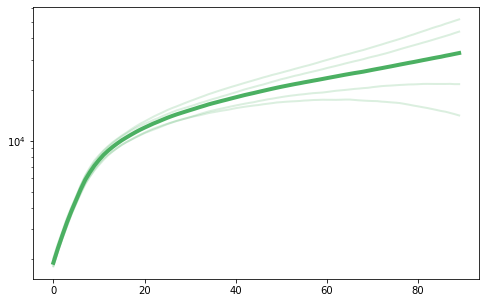

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
types = {'random':'Greys','tracing':'Purples', 'greedy2':'Blues', 'MF':'Greens', \
         'BP':'Oranges'}


alpha = 0.2
alpha1 = 1
alpham = 0.7

cmap = cm.get_cmap(types["MF"])
ax = scenario_MF[["I"]].sum(axis=1).plot(ax=ax, label="scenario_MF", 
                                                     color=cmap(0.6), alpha = alpha1,
                                                     linewidth = 4.0)
for seed in seeds:
    cmap = cm.get_cmap(types["MF"])
    ax = scenario_MFs[seed][["I"]].sum(axis=1).plot(ax=ax, label="scenario_MF", 
                                                         color=cmap(0.6), alpha = alpha,
                                                     linewidth = 2.0)
ax.set_yscale('log')
fig.savefig("500k_proximity_%dseeds_l%.2f_m%.2f_MF.png"%(len(seeds),lamb,mu))

NameError: name 'n_rank' is not defined

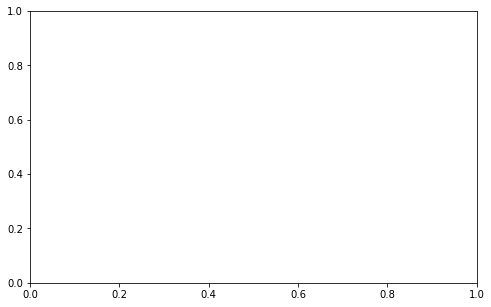

In [3]:
#import matplotlib.pyplot as plt
#fig,ax = plt.subplots()
#ax.plot(n_rank, color="Blue", marker="o")
#ax.set_ylabel("Mean number of confined individuals (ranking)")
#ax.set_xlabel("Days")

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
types = {'random':'Greys','tracing':'Purples', 'greedy2':'Blues', 'MF':'Greens', \
         'BP':'Oranges'}


alpha = 0.2
alpha1 = 1
alpham = 0.7

cmap = cm.get_cmap(types["greedy2"])
ax.plot(n_rank, label="scenario_trac", color=cmap(0.6), alpha = alpha1, linewidth = 4.0)
ax.vlines(5, min(n_rank), max(n_rank)+50, linestyle=":", color="Black", alpha=alpham)
ax.set_ylabel("Number of confined \nindividuals (ranking)", fontsize = 16)
ax.set_xlabel("Days", fontsize = 16)
ax.set_title("CT2, 1500 obs.", fontsize = 16)
ax.set_yscale('log')
ax.spines['left'].set_color(cmap(0.6))
ax.yaxis.label.set_color(cmap(0.6))
#ax.tick_params(axis='y', color=cmap(0.6),labelsize = 16)
plt.ylim(min(n_rank), max(n_rank)+50)


ax2 = ax.twinx()
ax2.plot(n_count, color="Black", marker="x", alpha = alpham)
ax2.set_ylabel("Number of contacts \nwith confirmed infected", fontsize = 16)
plt.show()

fig.savefig("500k_proximity_quar_%dseeds_l%.2f_m%.2f.png"%(len(seeds),lamb,mu),bbox_inches="tight")



In [ ]:
scenario_BPs[seed]
